In [32]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [33]:
generator = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2,
)

In [34]:
train_generator = generator.flow_from_directory(
    'data/expression',
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    color_mode='grayscale'
)
val_generator = generator.flow_from_directory(
    'data/expression',
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    color_mode='grayscale'
)

Found 28713 images belonging to 7 classes.
Found 7174 images belonging to 7 classes.


In [40]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 46, 46, 64)        640       
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 10, 10, 128)      0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 12800)             0         
                                                                 
 dense_33 (Dense)            (None, 512)             

In [41]:
history = model.fit(train_generator, epochs=50, validation_data=val_generator)

Epoch 1/50
898/898 [==============================] - 20s 22ms/step - loss: 1.7224 - accuracy: 0.3027 - val_loss: 1.6430 - val_accuracy: 0.3510
Epoch 2/50
898/898 [==============================] - 19s 21ms/step - loss: 1.5646 - accuracy: 0.3893 - val_loss: 1.5068 - val_accuracy: 0.4102
Epoch 3/50
898/898 [==============================] - 19s 21ms/step - loss: 1.4746 - accuracy: 0.4283 - val_loss: 1.4426 - val_accuracy: 0.4360
Epoch 4/50
898/898 [==============================] - 19s 21ms/step - loss: 1.4126 - accuracy: 0.4538 - val_loss: 1.4269 - val_accuracy: 0.4473
Epoch 5/50
898/898 [==============================] - 19s 21ms/step - loss: 1.3686 - accuracy: 0.4719 - val_loss: 1.3912 - val_accuracy: 0.4619
Epoch 6/50
898/898 [==============================] - 19s 21ms/step - loss: 1.3338 - accuracy: 0.4870 - val_loss: 1.3414 - val_accuracy: 0.4795
Epoch 7/50
898/898 [==============================] - 19s 21ms/step - loss: 1.3102 - accuracy: 0.4953 - val_loss: 1.3451 - val_accuracy:

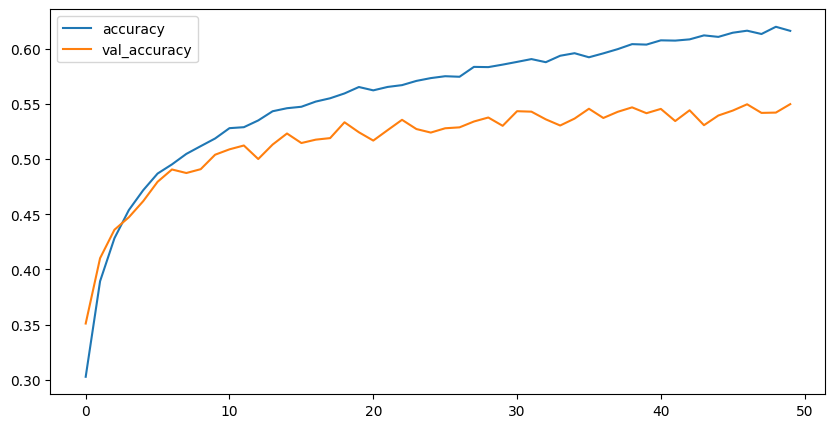

In [42]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()